In [1]:
#Import libraries
import pandas as pd
import json
import numpy as np
from pandas.io.json import json_normalize
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load PRRAH json files from globbing
json_prrah=glob.glob('PRRAH/PRRAH_*.json')

#Initialize list to append DataFrames to
prrah_list=[]

#Create empty master dataframe
prr_df=pd.DataFrame(columns=['zip','date','pr_ratio','year','month'])

#For loop to go through filenames
for filename in json_prrah:
    data = pd.read_json(filename)
    df1=pd.DataFrame(data['dataset_data']['data'],columns=['date','pr_ratio'])
    prrah_list.append(data)
    #pull in filename and use split
    file_str = filename.replace('_',' ').replace('.',' ').split()
    df1['zip'] = file_str[1]
    #Create Year/Month columns
    df1['date_split'] = df1['date'].str.split('-')
    df1['year'] = df1['date_split'].str.get(0)
    df1['month'] = df1['date_split'].str.get(1)
    #concat DataFrames
    prr_df = pd.concat([prr_df,df1],axis=0,ignore_index=True)
    
    

    
# #Convert date to datetime
# prr_df.date = pd.to_datetime(prr_df.date, format='%Y-%m')

#Create zip_date
prr_df['date_zip'] = prr_df['year'] + prr_df['month'] + '_' + prr_df['zip']

prr_df

,date,date_split,month,pr_ratio,year,zip,date_zip
0,2017-05-31,"[2017, 05, 31]",05,26.39,2017,10001,201705_10001
1,2017-04-30,"[2017, 04, 30]",04,25.61,2017,10001,201704_10001
2,2017-03-31,"[2017, 03, 31]",03,25.56,2017,10001,201703_10001
3,2017-02-28,"[2017, 02, 28]",02,25.83,2017,10001,201702_10001
4,2017-01-31,"[2017, 01, 31]",01,25.55,2017,10001,201701_10001
5,2016-12-31,"[2016, 12, 31]",12,25.71,2016,10001,201612_10001
6,2016-11-30,"[2016, 11, 30]",11,25.76,2016,10001,201611_10001
7,2016-10-31,"[2016, 10, 31]",10,25.67,2016,10001,201610_10001
8,2016-09-30,"[2016, 09, 30]",09,25.60,2016,10001,201609_10001
9,2016-08-31,"[2016, 08, 31]",08,24.95,2016,10001,201608_10001


In [3]:
#Load Median Listing Price json files from globbing
json_mlpah=glob.glob('MLPAH/MLPAH_*.json')

#Initialize list to append DataFrames to
mlpah_list=[]

#Create empty master dataframe
mlp_df=pd.DataFrame(columns=['zip','date','median_list_price'])

#For loop to go through filenames
for filename in json_mlpah:
    data = pd.read_json(filename)
    df1=pd.DataFrame(data['dataset_data']['data'],columns=['date','median_list_price'])
    mlpah_list.append(data)
    #pull in filename and use split
    file_str = filename.replace('_',' ').replace('.',' ').split()
    df1['zip'] = file_str[1]
    #Create Year/Month columns
    df1['date_split'] = df1['date'].str.split('-')
    df1['year'] = df1['date_split'].str.get(0)
    df1['month'] = df1['date_split'].str.get(1)
    #concat DataFrames
    mlp_df = pd.concat([mlp_df,df1],axis=0,ignore_index=True)
    
# mlp_df.date = pd.to_datetime(mlp_df.date, format ='%Y-%m')
#Create zip_date
mlp_df['date_zip'] = mlp_df['year'] + mlp_df['month'] + '_' + prr_df['zip']

mlp_df

,date,date_split,median_list_price,month,year,zip,date_zip
0,2018-01-31,"[2018, 01, 31]",3300000.0,01,2018,10001,201801_10001
1,2017-12-31,"[2017, 12, 31]",3110000.0,12,2017,10001,201712_10001
2,2017-11-30,"[2017, 11, 30]",2985000.0,11,2017,10001,201711_10001
3,2017-10-31,"[2017, 10, 31]",2990000.0,10,2017,10001,201710_10001
4,2017-09-30,"[2017, 09, 30]",3000000.0,09,2017,10001,201709_10001
5,2017-08-31,"[2017, 08, 31]",3050000.0,08,2017,10001,201708_10001
6,2017-07-31,"[2017, 07, 31]",3075000.0,07,2017,10001,201707_10001
7,2017-06-30,"[2017, 06, 30]",2997500.0,06,2017,10001,201706_10001
8,2017-05-31,"[2017, 05, 31]",2820000.0,05,2017,10001,201705_10001
9,2017-04-30,"[2017, 04, 30]",2922500.0,04,2017,10001,201704_10001


In [4]:
#Load Airbnb Listing csv files from globbing
csv_listings=glob.glob('Airbnb_data/listings_*.csv')

#Create empty master dataframe
abnb_df=pd.DataFrame(columns=['id'])

# # #For loop to go through filenames
# for filename in csv_listings:
#     data = pd.read_csv(filename,low_memory=False,dtype={"id": int, "listing_url": str, "scrape_id": int,"name": str,"summary":str,"space":str,"description":str ,"experiences_offered":str,"neighborhood_overview":str,"notes":str,"has_availability":str,"reviews_per_month":float})
#     df1 = data[['id','availability_30','zipcode']]
#     file_str = filename.replace('_',' ').replace('.',' ').split()
#     scrape_date = file_str[2]
#     df1.rename(columns={"availability_30": scrape_date},inplace=True)
#     #merge DataFrames on id# of listing
#     abnb_df = pd.merge(left=df1,right=abnb_df, on='id', how='outer')

# abnb_df

# #Load Airbnb listings data
# listings_201710 = pd.read_csv('Airbnb_data/listings_20171002.csv',dtype={"id": int, "listing_url": str, "scrape_id": int,"name": str,"summary":str,"space":str,"description":str ,"experiences_offered":str,"neighborhood_overview":str,"notes":str,"has_availability":str,"availability_30":int,"availability_60":int,"availability_90":int,"availability_365":int,"cancellation_policy":str,"require_guest_profile_picture":str,"require_guest_phone_verification":str,"calculated_host_listings_count":int,"reviews_per_month":float
# })
# listings_201710.head()

#Column names to specify: id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month

# OLD CODE
# airbnb_df = listings[['zipcode','id','last_scraped','host_id','host_name','host_since','host_location','host_response_time','host_response_rate','host_is_superhost','smart_location','latitude','longitude','is_location_exact','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','weekly_price','monthly_price']]
# list_check=listings[['has_availability','availability_30','availability_60','availability_90','availability_365']]
# unavail = list_check['has_availability']=='f'
# list_check[unavail]
# END OLD CODE


In [72]:
#Empty Master DataFrame
airbnb_df=pd.DataFrame(columns=['id','date','zipcode','date_zip','availability_30'])


#Need to put in tidy data form
for filename in csv_listings:
    data = pd.read_csv(filename,low_memory=False,dtype={"id": int, "listing_url": str, "scrape_id": int,"name": str,"summary":str,"space":str,"description":str ,"experiences_offered":str,"neighborhood_overview":str,"notes":str,"has_availability":str,"reviews_per_month":float})
    df1 = data[['id','availability_30','zipcode','property_type','room_type','accommodates','price']]
    file_str = filename.replace('_',' ').replace('.',' ').split()
    scrape_date = file_str[2]
    df1['date'] = scrape_date    
    #Create Year/Month columns
    df1['date'] = df1['date'].str.split('-')
    df1['year'] = df1['date'].str.get(0)
    df1['month'] = df1['date'].str.get(1)
    df1['date'] = df1['year'] + '-' + df1['month']
    df1['date_zip'] = df1['year'] + df1['month'] + '_' + df1['zipcode'] 
    #merge DataFrames on id# of listing
    airbnb_df = pd.concat([airbnb_df,df1],axis=0,ignore_index=True)

airbnb_df['date'] = pd.to_datetime(airbnb_df['date'], format='%Y-%m')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '')
airbnb_df['price'] = [x.strip('$') for x in airbnb_df['price']]
airbnb_df['price'] = pd.to_numeric(airbnb_df['price'])
# airbnb_df.info()
# airbnb_df.describe()
#Info shows 1095681 entries; for availability_30 column less than 1% missing; for zipcode less than 2% missing
#Therefore, acceptable to drop NAN
airbnb_df = airbnb_df.dropna(axis=0,how='any')
airbnb_df.info()

# airbnb_clean.describe()

#Valid zipcodes
nyczips=['10453', '10457', '10460', '10458', '10467', '10468', '10451', '10452', '10456', '10454', '10455', '10459', '10474', '10463', '10471', '10466', '10469', '10470', '10475', '10461', '10462', '10464', '10465', '10472', '10473', '11212', '11213', '11216', '11233', '11238', '11209', '11214', '11228', '11204', '11218', '11219', '11230', '11234', '11236', '11239', '11223', '11224', '11229', '11235', '11201', '11205', '11215', '11217', '11231', '11203', '11210', '11225', '11226', '11207', '11208', '11211', '11222', '11220', '11232', '11206', '11221', '11237', '10026', '10027', '10030', '10037', '10039', '10001', '10011', '10018', '10019', '10020', '10036', '10029', '10035', '10010', '10016', '10017', '10022', '10012', '10013', '10014', '10004', '10005', '10006', '10007', '10038', '10280', '10002', '10003', '10009', '10021', '10028', '10044', '10065', '10075', '10128', '10023', '10024', '10025', '10031', '10032', '10033', '10034', '10040', '11361', '11362', '11363', '11364', '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11365', '11366', '11367', '11412', '11423', '11432', '11433', '11434', '11435', '11436', '11101', '11102', '11103', '11104', '11105', '11106', '11374', '11375', '11379', '11385', '11691', '11692', '11693', '11694', '11695', '11697', '11004', '11005', '11411', '11413', '11422', '11426', '11427', '11428', '11429', '11414', '11415', '11416', '11417', '11418', '11419', '11420', '11421', '11368', '11369', '11370', '11372', '11373', '11377', '11378', '10302', '10303', '10310', '10306', '10307', '10308', '10309', '10312', '10301', '10304', '10305', '10314']
zip_clean = airbnb_df[airbnb_df['zipcode'].isin(nyczips)]

zip_clean.info()
#Resulted in 1062570 entries 

zip_clean

#Commented out for now
# zip_clean['availability_30'] = pd.to_numeric(zip_clean.availability_30,errors='coerce')

airbnb_group = zip_clean.groupby('date_zip')
type(airbnb_group)

airbnb_counts = {datezip:group.loc[group['availability_30']>0,'id'].count()
                     for datezip,group in airbnb_group}

airbnb_availcounts = pd.Series(airbnb_counts)

#by date_zip, room type
airbnb_bydzrt = zip_clean.groupby(['date_zip','room_type'])
airbnb_bydzrt_roomcount = airbnb_bydzrt['date'].value_counts()

# airbnb_bydzrt_roomcount
    
    

/Users/Administrator/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/Administrator/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/Administrator/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083744 entries, 0 to 1095679
Data columns (total 11 columns):
accommodates       1083744 non-null float64
availability_30    1083744 non-null object
date               1083744 non-null datetime64[ns]
date_zip           1083744 non-null object
id                 1083744 non-null object
month              1083744 non-null object
price              1083744 non-null float64
property_type      1083744 non-null object
room_type          1083744 non-null object
year               1083744 non-null object
zipcode            1083744 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 99.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062526 entries, 0 to 1095678
Data columns (total 11 columns):
accommodates       1062526 non-null float64
availability_30    1062526 non-null object
date               1062526 non-null datetime64[ns]
date_zip           1062526 non-null object
id                 1062526 non-null ob

<IPython.core.display.Javascript object>


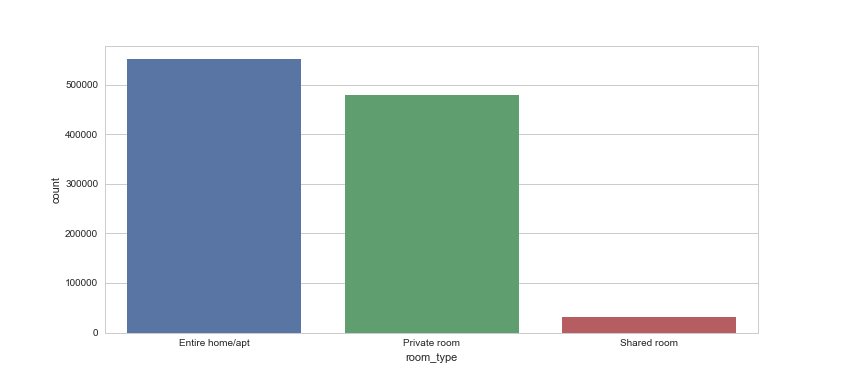

In [44]:
#Look at all NYC Airbnb's roomtypes from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
sns.countplot(x="room_type", data=zip_clean)
plt.show()


<IPython.core.display.Javascript object>


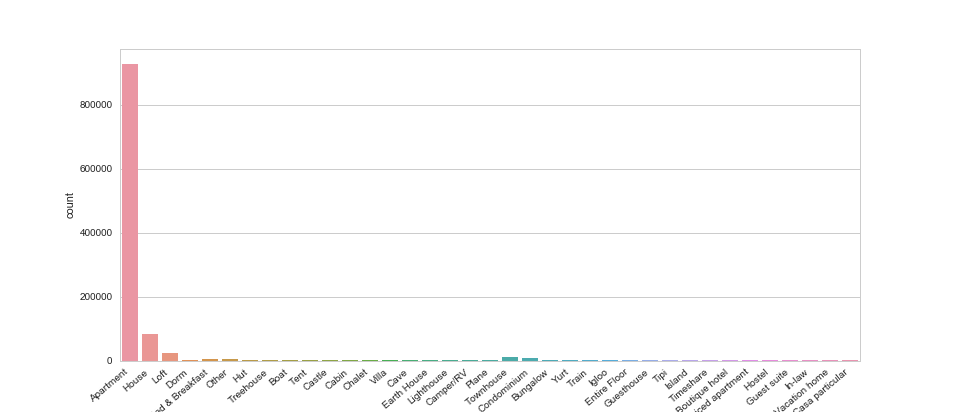

In [43]:
#Look at all NYC Airbnb's property types from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
g = sns.countplot(x="property_type", data=zip_clean)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.show()


<IPython.core.display.Javascript object>


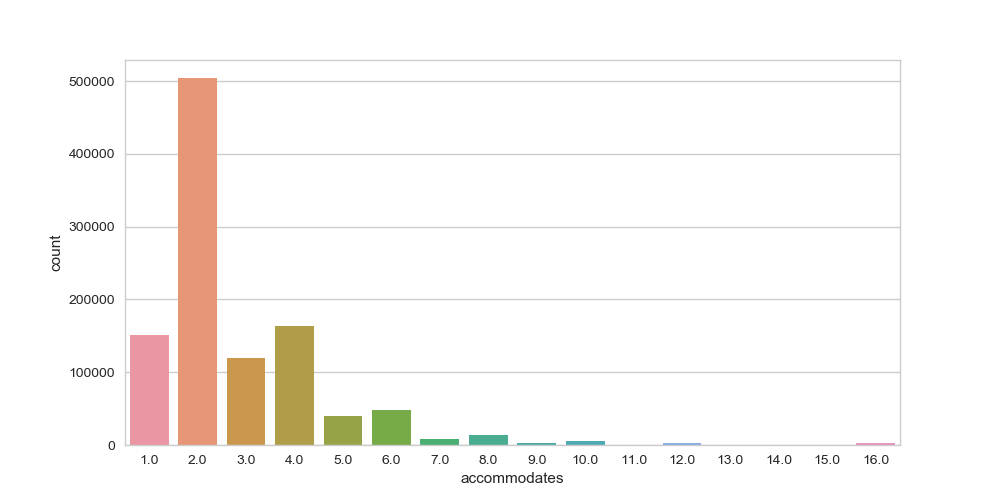

In [20]:
#Look at how many people all NYC Airbnb's from 2015-2017 period accommodate
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
sns.countplot(x='accommodates', data=zip_clean)
plt.show()


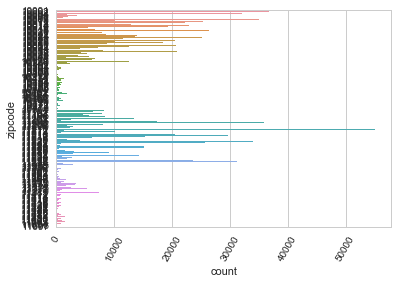

In [64]:
#Look at all NYC Airbnb's zipcodes from 2015-2017 period
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
sns.countplot(y="zipcode", data=zip_clean)
plt.xticks(rotation=60)

plt.show()

In [ ]:
sns.set(style="ticks")
# Plot the Airbnb prices
sns.boxplot(x='zipcode', y="price", data=zip_clean)

# Add in points to show each observation
sns.swarmplot(x="price", y="zipcode", data=zip_clean,
              size=2, color=".3", linewidth=0)



/Users/Administrator/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1222: RuntimeWarning: invalid value encountered in sqrt
  dx = np.sqrt(d ** 2 - dy ** 2) * 1.05


In [35]:
airbnb_agg = pd.DataFrame(airbnb_availcounts, columns=['active_count'])
airbnb_agg['date_zip']=airbnb_agg.index
airbnb_agg['datezip_split'] = airbnb_agg['date_zip'].str.split('_')
airbnb_agg['zip'] = airbnb_agg['datezip_split'].str.get(1)
airbnb_agg['date'] = airbnb_agg['datezip_split'].str.get(0)
airbnb_agg['year'] = airbnb_agg['date'].str[0:4]
airbnb_agg['month'] = airbnb_agg['date'].str[4:6]
airbnb_agg['date'] = airbnb_agg['year']+'-'+airbnb_agg['month']
airbnb_agg['date'] = pd.to_datetime(airbnb_agg['date'], format='%Y-%m')
airbnb_agg.drop(['datezip_split'],axis=1,inplace=True)

airbnb_roomtype = pd.DataFrame(airbnb_bydzrt_roomcount,columns=['date_zip','duplicate','room_type','room_count'])
airbnb_roomtype
# airbnb_agg = pd.merge(left=airbnb_agg,right=airbnb_roomtype, on='date_zip', how='outer')

# airbnb_agg

date_zip duplicate  room_type  \
date_zip     room_type       room_type                                       
201501_10001 Entire home/apt Entire home/apt      NaN       NaN        249   
             Private room    Private room         NaN       NaN        103   
             Shared room     Shared room          NaN       NaN         13   
201501_10002 Entire home/apt Entire home/apt      NaN       NaN        709   
             Private room    Private room         NaN       NaN        408   
             Shared room     Shared room          NaN       NaN         13   
201501_10003 Entire home/apt Entire home/apt      NaN       NaN        681   
             Private room    Private room         NaN       NaN        250   
             Shared room     Shared room          NaN       NaN         16   
201501_10004 Entire home/apt Entire home/apt      NaN       NaN         33   
             Private room    Private room         NaN       NaN         22   
             Shared room     Shared room          NaN       NaN          2   
201501_10005 Entire home/apt Entire home/apt      NaN       NaN        109   
             Private room    Private room         NaN       NaN         24   
             Shared room     Shared room          NaN       NaN         13   
201501_10006 Entire home/apt Entire home/apt      NaN       NaN         56   
             Private room    Private room         NaN       NaN         20   
             Shared room     Shared room          NaN       NaN          1   
201501_10007 Entire home/apt Entire home/apt      NaN       NaN         26   
             Private room    Private room         NaN       NaN         13   
201501_10009 Entire home/apt Entire home/apt      NaN       NaN        652   
             Private room    Private room         NaN       NaN        390   
             Shared room     Shared room          NaN       NaN         20   
201501_10010 Entire home/apt Entire home/apt      NaN       NaN        247   
             Private room    Private room         NaN       NaN         81   
             Shared room     Shared room          NaN       NaN          8   
201501_10011 Entire home/apt Entire home/apt      NaN       NaN        696   
             Private room    Private room         NaN       NaN        140   
             Shared room     Shared room          NaN       NaN         18   
201501_10012 Entire home/apt Entire home/apt      NaN       NaN        512   
...                                               ...       ...        ...   
201710_11427 Entire home/apt Entire home/apt      NaN       NaN          2   
             Private room    Private room         NaN       NaN          6   
201710_11428 Entire home/apt Entire home/apt      NaN       NaN          3   
             Private room    Private room         NaN       NaN          3   
201710_11429 Entire home/apt Entire home/apt      NaN       NaN          6   
             Private room    Private room         NaN       NaN         16   
201710_11432 Entire home/apt Entire home/apt      NaN       NaN         17   
             Private room    Private room         NaN       NaN         20   
             Shared room     Shared room          NaN       NaN          2   
201710_11433 Entire home/apt Entire home/apt      NaN       NaN          6   
             Private room    Private room         NaN       NaN          8   
201710_11434 Entire home/apt Entire home/apt      NaN       NaN         31   
             Private room    Private room         NaN       NaN         72   
             Shared room     Shared room          NaN       NaN          2   
201710_11435 Entire home/apt Entire home/apt      NaN       NaN         13   
             Private room    Private room         NaN       NaN         25   
             Shared room     Shared room          NaN       NaN          2   
201710_11436 Entire home/apt Entire home/apt      NaN       NaN          6   
             Private room    Private room         NaN       NaN    

<IPython.core.display.Javascript object>


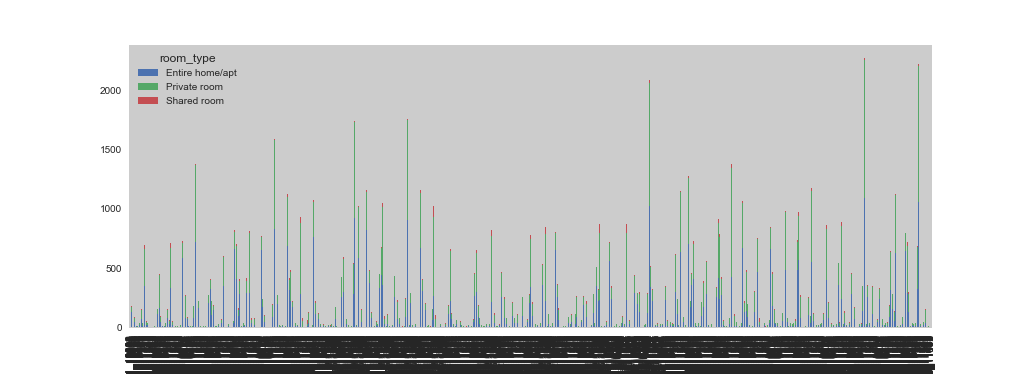

In [50]:
sns.set(style="whitegrid", color_codes=True)
%matplotlib notebook
zip_clean.groupby(['date_zip','room_type']).size().unstack().plot(kind='bar', stacked=True)
plt.xticks(rotation=90)
plt.show()


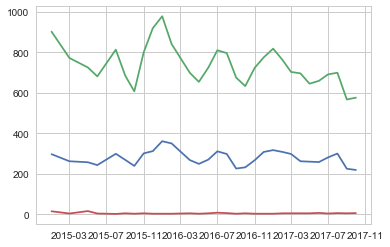

In [51]:
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

x10001 = airbnb_agg.loc[airbnb_agg['zip'] == '10001']['date']
y10001 = airbnb_agg.loc[airbnb_agg['zip'] == '10001']['active_count']
plt.plot(x10001, y10001)

x10002 = airbnb_agg.loc[airbnb_agg['zip'] == '10002']['date']
y10002 = airbnb_agg.loc[airbnb_agg['zip'] == '10002']['active_count']
plt.plot(x10002, y10002)

x11694 = airbnb_agg.loc[airbnb_agg['zip'] == '11694']['date']
y11694 = airbnb_agg.loc[airbnb_agg['zip'] == '11694']['active_count']
plt.plot(x11694,y11694)

plt.show()



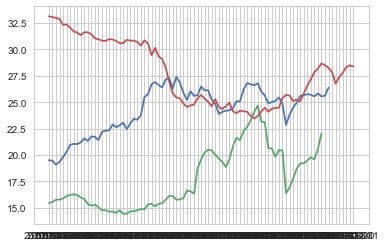

In [52]:
#Initial look at PRR data
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

prrx10001 = prr_df.loc[prr_df['zip'] == '10001']['date']
prry10001 = prr_df.loc[prr_df['zip'] == '10001']['pr_ratio']
plt.plot(prrx10001, prry10001)

prrx10002 = prr_df.loc[prr_df['zip'] == '10002']['date']
prry10002 = prr_df.loc[prr_df['zip'] == '10002']['pr_ratio']
plt.plot(prrx10002, prry10002)

prrx11694 = prr_df.loc[prr_df['zip'] == '11694']['date']
prry11694 = prr_df.loc[prr_df['zip'] == '11694']['pr_ratio']
plt.plot(prrx11694,prry11694)
plt.show()

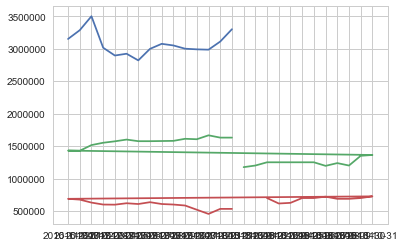

In [53]:
#Initial look at MLP data
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline

mlpx10001 = mlp_df.loc[mlp_df['zip'] == '10001']['date']
mlpy10001 = mlp_df.loc[mlp_df['zip'] == '10001']['median_list_price']
plt.plot(mlpx10001, mlpy10001)

mlpx10002 = mlp_df.loc[mlp_df['zip'] == '10002']['date']
mlpy10002 = mlp_df.loc[mlp_df['zip'] == '10002']['median_list_price']
plt.plot(mlpx10002, mlpy10002)

mlpx11694 = mlp_df.loc[mlp_df['zip'] == '11694']['date']
mlpy11694 = mlp_df.loc[mlp_df['zip'] == '11694']['median_list_price']
plt.plot(mlpx11694,mlpy11694)
plt.show()